In [1]:
#import h5py
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
%matplotlib inline

In [2]:
#define m1 and m2 merger
def MremArray(mass1,mass2):
    M0 = 0.951507
    K2d = 1.995246
    K4f = 2.980990
    
    sol_set = []
    
    for i in range(len(mass1)):
        MSum3 = mass1.item(i) + mass2.item(i)
        n3 = (mass1.item(i) * mass2.item(i)) / MSum3 
        dm3 = (mass1.item(i) - mass2.item(i)) / MSum3
        
        if mass1.item(i) > mass2.item(i):
        
            if mass2.item(i)/mass1.item(i) > 1/3:
                Mrem_Mass = ((4*n3) * (4*n3) * ( M0 + K2d*dm3**2 + K4f*dm3**4 ) + (1 + 17 * n3)*dm3**6) / MSum3
            else:
                Mrem_Mass = mass1.item(i) + mass2.item(i)
        else: 
            Mrem_Mass = 0
            
        sol_set += [Mrem_Mass]
    return sol_set


In [3]:
#define m1 and m2 merger
def Mrem(mass1,mass2):
    M0 = 0.951507
    K2d = 1.995246
    K4f = 2.980990
    MSum3 = mass1 + mass2
    n3 = (mass1 * mass2) / MSum3 
    dm3 = (mass1 - mass2) / MSum3
    
    if mass1 > mass2:
        
        if mass2/mass1 > 1/3:
            Mrem_Mass = ((4*n3) * (4*n3) * ( M0 + K2d*dm3**2 + K4f*dm3**4 ) + (1 + 17 * n3)*dm3**6) / MSum3
        else:
            Mrem_Mass = mass1 + mass2
    else: 
        Mrem_Mass = 0
            
    return Mrem_Mass



In [4]:
# P(Mk / m1i, m2j):
#Function where m1, m2, and Mk are input.
#if m1 and m2 merger result in Mk: 1, else: 0


def PMkBinaryArray(mass1, mass2, Massk, binMass):
    
    Mremnant = (MremArray(mass1, mass2))
    sol_set = []
    sol_set_i = []
    
    for j in range(len(Massk)):
        
        for i in range(len(Mremnant)):
        
            if (Mremnant[i] - binMass) <= Massk[j] <= (Mremnant[i] + binMass): 
                Pmkbin = 1
            else: 
                Pmkbin = 0
        
            sol_set_i += [Pmkbin]
            
        sol_set += [sol_set_i]
        sol_set_i = []
        
    return sol_set
    

In [5]:
# P(Mk / m1i, m2j):
#Function where m1, m2, and Mk are input.
#if m1 and m2 merger result in Mk: 1, else: 0


def PMkBinary(mass1, mass2, Massk, binMass):
    
    Mremnant = (Mrem(mass1, mass2))
        
    if (Mremnant - binMass) <= Massk <= (Mremnant + binMass): 
        Pmkbin = 1
    else: 
        Pmkbin = 0
        
    return Pmkbin
    

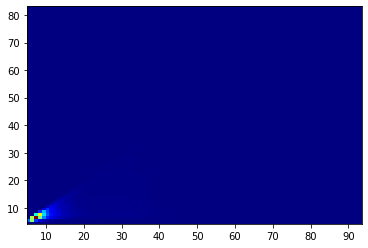

In [6]:
#pi(m1i,m2j)
#Joint Astrophysical Distribution

df1 = pd.read_csv('/Users/Oscar/Documents/Research/bbh_pop_samples_z1_more_data_v1.dat', delim_whitespace = True, index_col = None)
m1_powerlaw = df1['#']
m2_powerlaw = df1['m1']
M, xe, ye, img = plt.hist2d(m1_powerlaw, m2_powerlaw, bins = (87,78), cmap = plt.cm.jet, density =True)
plt.show()

In [7]:
#returns # of instances in each bin along x or y axis

ydist = []
sum = 0
for i in np.arange(len(M.T)):
    for j in np.arange(len(M.T[i])):
        sum = sum + (M.T[i,j])
    ydist += [sum]
    sum = 0
    
xdist = []
sum = 0
for i in np.arange(len(M)):
    for j in np.arange(len(M[i])):
        sum = sum + (M[i,j])
    xdist += [sum]
    sum = 0
    
#x bin length
binx = xe[1] - xe[0]
#y bin length
biny = ye[1] - ye[0]

In [ ]:
m1_p = np.random.choice(m1_powerlaw,1000)
m2_p = np.random.choice(m2_powerlaw,1000)

In [ ]:
#pi(Mk)

PiMk = []

instance = 0

import time 
tstart = time.time()

Massk = np.arange(5,121,1)

for k in range(len(Massk)):
    for i in range(len(m1_p)):
        for j in range(len(m2_p)):
        
            if PMkBinary(m1_p[i], m2_p[j], Massk[k], 1) == 1:
                
                instance += 1
                
    PiMk += [instance]
    instance = 0
    
    

print("Elapsed time: {:.2f}".format(time.time()-tstart)+" seconds")


PiMk2 (200 bins, size 2000)
[0,
 0,
 0,
 0,
 10,
 1602,
 26590,
 116499,
 257636,
 358987,
 377518,
 357822,
 325263,
 288021,
 255447,
 222427,
 191704,
 159710,
 130144,
 109248,
 93558,
 80949,
 69952,
 63429,
 61679,
 62859,
 65442,
 71019,
 78420,
 82142,
 84122,
 88451,
 91929,
 89306,
 81277,
 76343,
 79161,
 84602,
 88042,
 85313,
 77016,
 70348,
 66021,
 58791,
 48875,
 40049,
 33548,
 29239,
 25608,
 21889,
 18239,
 15238,
 13851,
 13437,
 13073,
 12008,
 10601,
 9264,
 8143,
 7268,
 7292,
 7630,
 7489,
 7216,
 6457,
 5769,
 4857,
 3659,
 2825,
 2621,
 2630,
 2623,
 2892,
 3200,
 3094,
 3078,
 3666,
 3681,
 3330,
 3209,
 2812,
 2308,
 2214,
 2576,
 3321,
 4074,
 4053,
 3876,
 3506,
 2658,
 1911,
 1373,
 1099,
 917,
 798,
 667,
 547,
 513,
 472,
 409,
 350,
 332,
 285,
 237,
 209,
 169,
 135,
 96,
 88,
 90,
 62,
 35,
 25,
 21,
 14,
 13]

In [8]:
PiMk_ = [0, 0, 0, 0, 10, 1602, 26590, 116499, 257636, 358987, 377518, 357822, 325263, 288021, 255447, 222427, 191704, 159710, 130144, 109248, 93558, 80949, 69952, 63429, 61679, 62859, 65442, 71019, 78420, 82142, 84122, 88451, 91929, 89306, 81277, 76343, 79161, 84602, 88042, 85313, 77016, 70348, 66021, 58791, 48875, 40049, 33548, 29239, 25608, 21889, 18239, 15238, 13851, 13437, 13073, 12008, 10601, 9264, 8143, 7268, 7292, 7630, 7489, 7216, 6457, 5769, 4857, 3659, 2825, 2621, 2630, 2623, 2892, 3200, 3094, 3078, 3666, 3681, 3330, 3209, 2812, 2308, 2214, 2576, 3321, 4074, 4053, 3876, 3506, 2658, 1911, 1373, 1099, 917, 798, 667, 547, 513, 472, 409, 350, 332, 285, 237, 209, 169, 135, 96, 88, 90, 62, 35, 25, 21, 14, 13]

PiMk1 (50 bins, size 1000)
[0,
 0,
 0,
 0,
 2,
 722,
 7060,
 27307,
 66107,
 100534,
 106540,
 95836,
 82106,
 69371,
 58982,
 49467,
 41372,
 35327,
 30254,
 26013,
 22759,
 20101,
 18091,
 15321,
 11960,
 11155,
 14222,
 18119,
 21131,
 23538,
 24101,
 23270,
 23090,
 23819,
 23651,
 22388,
 21145,
 20182,
 19578,
 19062,
 17676,
 15719,
 14362,
 12830,
 11221,
 10201,
 9516,
 8701,
 7599,
 6816,
 6366,
 5677,
 4764,
 4148,
 4208,
 4345,
 3787,
 3404,
 3401,
 2960,
 2227,
 1606,
 1225,
 1035,
 864,
 752,
 648,
 521,
 494,
 667,
 716,
 503,
 415,
 705,
 995,
 999,
 942,
 802,
 560,
 377,
 292,
 221,
 194,
 202,
 362,
 562,
 680,
 769,
 666,
 449,
 300,
 214,
 157,
 123,
 98,
 86,
 69,
 62,
 68,
 66,
 63,
 56,
 44,
 38,
 36,
 30,
 30,
 22,
 13,
 13,
 6,
 5,
 4,
 1,
 1,
 1]

In [9]:
# Pmk
#LIGO Distributions

import h5py

fn = '/Users/Oscar/Documents/Research/GW190521/GW190521.h5'
data = h5py.File(fn,'r')
waveform = 'C01:NRSur7dq4'
posterior_samples = data[waveform]['posterior_samples']
samples = np.array(posterior_samples).T

mass_1=posterior_samples['mass_1_source']
hist_mass_1=np.histogram(mass_1,bins=100,density=True)
dx=hist_mass_1[1][1]-hist_mass_1[1][0]
m1array = (hist_mass_1[1][:-1]+dx,hist_mass_1[0])

mass_2=posterior_samples['mass_2_source']
hist_mass_2=np.histogram(mass_2,bins=100,density=True)
dx=hist_mass_2[1][1]-hist_mass_2[1][0]
m2array = (hist_mass_2[1][:-1]+dx,hist_mass_2[0])

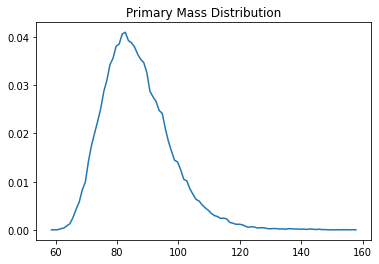

In [10]:
#Pm1
plt.plot(hist_mass_1[1][:-1]+dx,hist_mass_1[0])
plt.title('Primary Mass Distribution')
plt.show()

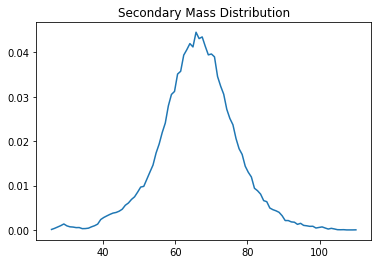

In [11]:
#Pm2
plt.plot(hist_mass_2[1][:-1]+dx,hist_mass_2[0])
plt.title('Secondary Mass Distribution')
plt.show()

In [12]:
#Define parameters for calculation

PrimaryMass = np.arange(5,150,1) #bounds of m1_p
SecondaryMass = np.arange(5,84,1) #bounds of m2_p
Massk = np.arange(5,121,1)

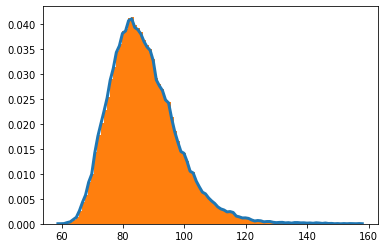

In [13]:
#convert from plot to hist to extract probability

plt.plot(m1array[0], m1array[1], linewidth = 3)
nm1, binsm1, _m1 = plt.hist(m1array[0], weights = m1array[1], bins = 100, density = True)
plt.show()

#binsm1[:-1]

#bins[:-1] are the masses, and n is the probability associated with it

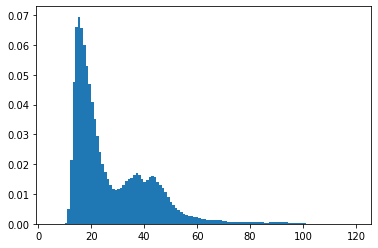

In [14]:
#distribution of PiMk 

npimk, binspimk, _pimk = plt.hist(Massk, weights = PiMk_, bins = len(PiMk_), density = True)
plt.show()

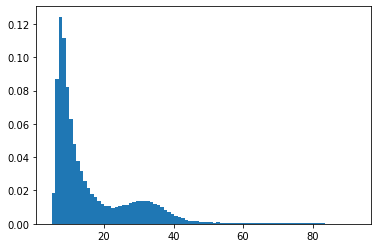

In [15]:
#ydist of Pi(m1i, m2j)
npiy, binspiy, _piy = plt.hist(xe[:-1], weights = xdist, bins = 87)
plt.show()

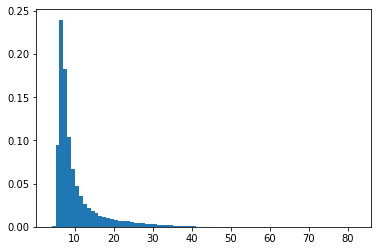

In [16]:
#xdist of Pi(m1i, m2j)
npix, binspix, _pix =plt.hist(ye[:-1], weights = ydist, bins = 78)
plt.show()

In [17]:
#xe, ye are same length as primary and secondary mass
#primary is 5 to 91, secondary is 5 to 81

#pmk size is 58 to 156
#pimk size is 5 to 119

In [18]:
#convert to data that can be merged into single dataframe

#truncate and convert to dataframe
pm1_masses = np.trunc(binsm1[:-1])
pm1_dist = nm1
pm1_zip = (list(zip(pm1_masses, pm1_dist)))
pm1_df = pd.DataFrame(pm1_zip, columns = ['pm1_mass', 'pm1_dist'])

pim1_masses = np.trunc(binspimk[1:-1])
pim1_dist = npimk[1:]
pim1_zip = (list(zip(pim1_masses, pim1_dist)))
pim1_df = pd.DataFrame(pim1_zip, columns = ['pim1_mass', 'pim1_dist'])


piastrom11_masses = np.trunc(binspiy[1:-1])
piastrom11_dist = npiy[1:]
piastrom11_zip = (list(zip(piastrom11_masses, piastrom11_dist)))
piastrom11_df = pd.DataFrame(piastrom11_zip, columns = ['piastrom11_mass', 'piastrom11_dist'])

In [21]:
#Define mass range for m11
m11 = np.arange(5,81,1)
m11 = m11.astype(float)
m11_df = pd.DataFrame(m11, columns = ['m11'])

In [29]:
mass11 = pm1_df.merge(pim1_df, left_on ='pm1_mass', right_on = 'pim1_mass', how = 'inner')
mass11 = mass11.drop(columns = ['pim1_mass'])
mass11

,pm1_mass,pm1_dist,pim1_dist
0,58.0,0.000015,0.002407
1,59.0,0.000015,0.002211
2,60.0,0.000046,0.001952
3,61.0,0.000246,0.001706
4,62.0,0.000399,0.001499
...,...,...,...
57,115.0,0.002286,0.000006
58,116.0,0.001565,0.000005
59,117.0,0.001396,0.000004
60,118.0,0.001182,0.000003


In [1]:
#merger data

m11_masses = np.arange(5,92)
m12_masses = np.arange(5,82)

m11_merge = []
m12_merge = [] 
m1_merged = []

import time
tstart = time.time()

M1 = np.arange(5,121,1)

for k in M1:
    for i in m11_masses:
        for j in m12_masses:
        
            if PMkBinary(i, j, k, .5) == 1:
                
                m11_merge += [i]
                m12_merge += [j]
                m1_merged += [k]
            

print("Elapsed time: {:.2f}".format(time.time()-tstart)+" seconds")

NameError: name 'np' is not defined

In [137]:
m11_dist = pd.DataFrame(list(zip(m11_merge, m12_merge, m1_merged)), columns = ['m11_merge', 'm12_merge', 'm1_merged'])
m11_dist

,m11_merge,m12_merge,m1_merged
0,6,5,10
1,7,5,11
2,7,6,12
3,8,5,12
4,8,6,13
...,...,...,...
2949,89,37,120
2950,90,30,120
2951,90,37,120
2952,91,29,120


In [138]:
m11_merger = m11_dist.merge(mass11, left_on = 'm1_merged', right_on = 'pm1_mass')
m11_merger = m11_merger.merge(piastrom11_df, left_on = 'm11_merge', right_on = 'piastrom11_mass')
m11_merger = m11_merger.drop(columns = ['pm1_mass', 'piastrom11_mass'])
m11_merger

,m11_merge,m12_merge,m1_merged,pm1_dist,pim1_dist,piastrom11_dist
0,31,30,58,0.000015,0.002407,0.013810
1,32,29,58,0.000015,0.002407,0.013704
2,32,30,59,0.000015,0.002211,0.013704
3,32,31,60,0.000046,0.001952,0.013704
4,33,28,58,0.000015,0.002407,0.012923
...,...,...,...,...,...,...
2296,91,26,117,0.001396,0.000004,0.000004
2297,91,34,117,0.001396,0.000004,0.000004
2298,91,27,118,0.001182,0.000003,0.000004
2299,91,28,119,0.001197,0.000002,0.000004


In [139]:
def prob_m(piastro, pmk, pimk):
    prob = piastro * (pmk / pimk)
    return prob

In [140]:
probabilitym11 = []
for i in range(len(m11_merger['m11_merge'])):
    probabilitym11 += [prob_m(m11_merger['piastrom11_dist'][i], 
                           m11_merger['pm1_dist'][i], m11_merger['pim1_dist'][i])]

In [141]:
m11_merger['probabilitym11'] = probabilitym11

In [143]:
m11_merger = m11_merger.rename(columns={'m11_merge': 'm11_mass', 'm12_merge': 'm12_mass', 'pim1_dist' : 'pimk', 'piastrom11_dist' : 'astroprimary'})
m11_merger

,m11_mass,m12_mass,m1_merged,pm1_dist,pimk,astroprimary,probabilitym11
0,31,30,58,0.000015,0.002407,0.013810,0.000088
1,32,29,58,0.000015,0.002407,0.013704,0.000087
2,32,30,59,0.000015,0.002211,0.013704,0.000095
3,32,31,60,0.000046,0.001952,0.013704,0.000323
4,33,28,58,0.000015,0.002407,0.012923,0.000082
...,...,...,...,...,...,...,...
2296,91,26,117,0.001396,0.000004,0.000004,0.001476
2297,91,34,117,0.001396,0.000004,0.000004,0.001476
2298,91,27,118,0.001182,0.000003,0.000004,0.001873
2299,91,28,119,0.001197,0.000002,0.000004,0.002044


In [126]:
#compare to old data
data_mass = pd.read_excel (r'/Users/Oscar/Documents/Research/GW190521.xlsx',
                           sheet_name="Distributions_Powerlaw" , engine='openpyxl')
df = pd.DataFrame(data_mass)

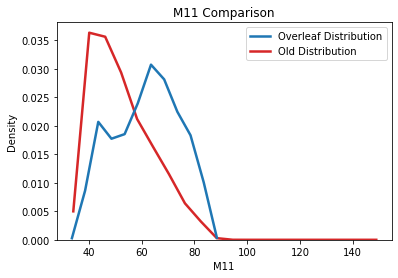

In [161]:
#M11

import seaborn as sns

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

sns.histplot(data =df, x = 'M11', element = 'poly', 
                  weights = 'PLWeight_M11', stat = 'density',linewidth = 2.5,
                 bins = 20, fill = False, common_norm = False, color = 'C3')

sns.histplot(data =m11_merger, x = 'm11_mass', element = 'poly', 
                  weights = 'probabilitym11', stat = 'density', linewidth = 2.5,
                 bins = 12, fill = False, common_norm = False, color = 'C0')



plt.title('M11 Comparison')
leg = ax.legend(labels=["Overleaf Distribution", "Old Distribution"])

leg.legendHandles[0].set_color('C0')
leg.legendHandles[1].set_color('C3')

plt.show()


In [145]:
#Now for m12

piastrom12_masses = np.trunc(binspix[1:-1])
piastrom12_dist = npix[1:]
piastrom12_zip = (list(zip(piastrom12_masses, piastrom12_dist)))
piastrom12_df = pd.DataFrame(piastrom12_zip, columns = ['piastrom12_mass', 'piastrom12_dist'])
piastrom12_df

,piastrom12_mass,piastrom12_dist
0,5.0,0.094729
1,6.0,0.239543
2,7.0,0.182975
3,8.0,0.103716
4,9.0,0.066520
...,...,...
72,77.0,0.000016
73,78.0,0.000008
74,79.0,0.000008
75,80.0,0.000004


In [147]:
m12_merger = m11_merger.drop(columns = ['astroprimary', 'probabilitym11'])
m12_merger = m12_merger.merge(piastrom12_df, left_on = 'm12_mass', right_on = 'piastrom12_mass')
m12_merger = m12_merger.drop(columns = ['piastrom12_mass'])

In [148]:
probabilitym12 = []
for i in range(len(m12_merger['m12_mass'])):
    probabilitym12 += [prob_m(m12_merger['piastrom12_dist'][i], 
                           m12_merger['pm1_dist'][i], m12_merger['pimk'][i])]
    
    
m12_merger['probabilitym12'] = probabilitym12

m12_merger = m12_merger.rename(columns={'piastrom12_dist' : 'astrosecondary'})
m12_merger

,m11_mass,m12_mass,m1_merged,pm1_dist,pimk,astrosecondary,probabilitym12
0,31,30,58,0.000015,0.002407,0.002677,0.000017
1,32,30,59,0.000015,0.002211,0.002677,0.000019
2,33,30,60,0.000046,0.001952,0.002677,0.000063
3,34,30,61,0.000246,0.001706,0.002677,0.000385
4,35,30,62,0.000399,0.001499,0.002677,0.000712
...,...,...,...,...,...,...,...
2296,65,60,119,0.001197,0.000002,0.000053,0.026570
2297,62,61,117,0.001396,0.000004,0.000057,0.020665
2298,63,61,118,0.001182,0.000003,0.000057,0.026229
2299,64,61,119,0.001197,0.000002,0.000057,0.028613


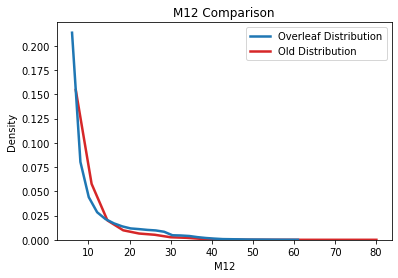

In [149]:
#M12
import seaborn as sns

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

sns.histplot(data =df, x = 'M12', element = 'poly', 
                  weights = 'PLWeight_M12', stat = 'density',linewidth = 2.5,
                 bins = 20, fill = False, common_norm = False, color = 'C3')

sns.histplot(data =m12_merger, x = 'm12_mass', element = 'poly', 
                  weights = 'probabilitym12', stat = 'density', linewidth = 2.5,
                 bins = 28, fill = False, common_norm = False, color = 'C0')



plt.title('M12 Comparison')
leg = ax.legend(labels=["Overleaf Distribution", "Old Distribution"])

leg.legendHandles[0].set_color('C0')
leg.legendHandles[1].set_color('C3')

plt.show()



In [150]:
#Export as CSV

m11_merger.to_csv("/Users/Oscar/Documents/Research/Overleaf Distributions/m11distribution.csv", index = False)
m12_merger.to_csv("/Users/Oscar/Documents/Research/Overleaf Distributions/m12distribution.csv", index = False)



## Mass 2 Distributions

In [30]:
#merger data

m21_array = np.arange(5,92)
m22_array = np.arange(5,82)

m21_mass = []
m22_mass = [] 
m2_merged = []

import time
tstart = time.time()

M2 = np.arange(5,121,1)

for k in M2:
    for i in m21_array:
        for j in m22_array:
        
            if PMkBinary(i, j, k, .5) == 1:
                
                m21_mass += [i]
                m22_mass += [j]
                m2_merged += [k]
            

print("Elapsed time: {:.2f}".format(time.time()-tstart)+" seconds")

Elapsed time: 4.09 seconds


In [31]:
m2_combinations = pd.DataFrame(list(zip(m21_mass, m22_mass, m2_merged)), columns = ['m21_mass', 'm22_mass', 'm2_merged'])

In [33]:
m2_combinations

,m21_mass,m22_mass,m2_merged
0,6,5,10
1,7,5,11
2,7,6,12
3,8,5,12
4,8,6,13
...,...,...,...
2949,89,37,120
2950,90,30,120
2951,90,37,120
2952,91,29,120


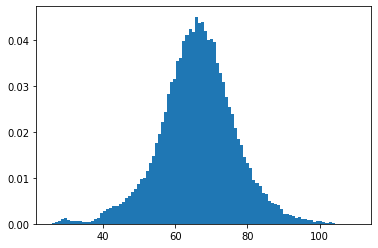

In [34]:
nm2, binsm2, _m2 = plt.hist(m2array[0], weights = m2array[1], bins = 100, density = True)
plt.show()

In [35]:
pm2_masses = np.trunc(binsm2[:-1])
pm2_dist = nm2
pm2_zip = (list(zip(pm2_masses, pm2_dist)))
pm2_df = pd.DataFrame(pm2_zip, columns = ['pm2_mass', 'pm2_dist'])

pimk_masses = np.trunc(binspimk[1:-1])
pimk_dist = npimk[1:]
pimk_zip = (list(zip(pimk_masses, pimk_dist)))
pimk_df = pd.DataFrame(pimk_zip, columns = ['pimk_mass', 'pimk'])

piastrom21_masses = np.trunc(binspiy[1:-1])
piastrom21_dist = npiy[1:]
piastrom21_zip = (list(zip(piastrom21_masses, piastrom21_dist)))
piastrom21_df = pd.DataFrame(piastrom21_zip, columns = ['piastrom21_mass', 'astroprimary'])

piastrom22_masses = np.trunc(binspix[1:-1])
piastrom22_dist = npix[1:]
piastrom22_zip = (list(zip(piastrom22_masses, piastrom22_dist)))
piastrom22_df = pd.DataFrame(piastrom22_zip, columns = ['piastrom22_mass', 'astrosecondary'])

In [152]:
m21df = m2_combinations.merge(pm2_df, left_on = 'm2_merged', right_on = 'pm2_mass')
m21df = m21df.merge(pimk_df, left_on = 'm2_merged', right_on = 'pimk_mass')
m21df = m21df.merge(piastrom21_df, left_on = 'm21_mass', right_on = 'piastrom21_mass')
m21df = m21df.drop(columns = ['pm2_mass', 'pimk_mass', 'piastrom21_mass'])

In [153]:
probabilitym21 = []
for i in range(len(m21df['m21_mass'])):
    probabilitym21 += [prob_m(m21df['astroprimary'][i], 
                           m21df['pm2_dist'][i], m21df['pimk'][i])]
    
    
m21df['probabilitym21'] = probabilitym21
m21df

,m21_mass,m22_mass,m2_merged,pm2_dist,pimk,astroprimary,probabilitym21
0,14,12,25,0.000108,0.014904,0.025928,0.000189
1,14,13,26,0.000361,0.012879,0.025928,0.000727
2,15,11,25,0.000108,0.014904,0.021444,0.000156
3,15,12,26,0.000361,0.012879,0.021444,0.000602
4,15,13,27,0.000669,0.011678,0.021444,0.001228
...,...,...,...,...,...,...,...
2945,91,14,105,0.000054,0.000061,0.000004,0.000004
2946,91,15,106,0.000000,0.000052,0.000004,0.000000
2947,91,16,107,0.000000,0.000044,0.000004,0.000000
2948,91,17,108,0.000000,0.000038,0.000004,0.000000


In [154]:
m22df = m2_combinations.merge(pm2_df, left_on = 'm2_merged', right_on = 'pm2_mass')
m22df = m22df.merge(pimk_df, left_on = 'm2_merged', right_on = 'pimk_mass')
m22df = m22df.merge(piastrom22_df, left_on = 'm22_mass', right_on = 'piastrom22_mass')
m22df = m22df.drop(columns = ['pm2_mass', 'pimk_mass', 'piastrom22_mass'])

In [155]:
probabilitym22 = []
for i in range(len(m22df['m22_mass'])):
    probabilitym22 += [prob_m(m22df['astrosecondary'][i], 
                           m22df['pm2_dist'][i], m22df['pimk'][i])]
    
    
m22df['probabilitym22'] = probabilitym22
m22df

,m21_mass,m22_mass,m2_merged,pm2_dist,pimk,astrosecondary,probabilitym22
0,14,12,25,0.000108,0.014904,0.026623,0.000194
1,15,12,26,0.000361,0.012879,0.026623,0.000747
2,16,12,27,0.000669,0.011678,0.026623,0.001524
3,17,12,28,0.000976,0.011356,0.026623,0.002287
4,18,12,29,0.001355,0.011573,0.026623,0.003117
...,...,...,...,...,...,...,...
2945,60,55,109,0.000018,0.000031,0.000065,0.000038
2946,57,56,108,0.000000,0.000038,0.000082,0.000000
2947,58,56,108,0.000000,0.000038,0.000082,0.000000
2948,59,56,109,0.000018,0.000031,0.000082,0.000047


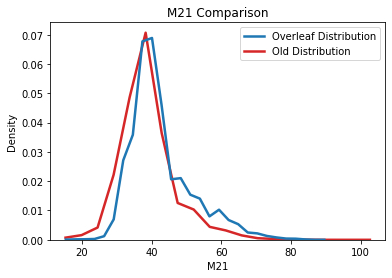

In [156]:
import seaborn as sns

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

sns.histplot(data =df, x = 'M21', element = 'poly', 
                  weights = 'PLWeight_M21', stat = 'density',linewidth = 2.5,
                 bins = 20, fill = False, common_norm = False, color = 'C3')

sns.histplot(data =m21df, x = 'm21_mass', element = 'poly', 
                  weights = 'probabilitym21', stat = 'density', linewidth = 2.5,
                 bins = 28, fill = False, common_norm = False, color = 'C0')



plt.title('M21 Comparison')
leg = ax.legend(labels=["Overleaf Distribution", "Old Distribution"])

leg.legendHandles[0].set_color('C0')
leg.legendHandles[1].set_color('C3')

plt.show()

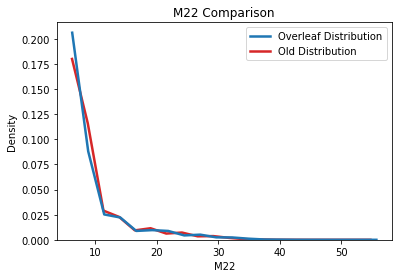

In [157]:
import seaborn as sns

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

sns.histplot(data =df, x = 'M22', element = 'poly', 
                  weights = 'PLWeight_M22', stat = 'density',linewidth = 2.5,
                 bins = 20, fill = False, common_norm = False, color = 'C3')

sns.histplot(data =m22df, x = 'm22_mass', element = 'poly', 
                  weights = 'probabilitym22', stat = 'density', linewidth = 2.5,
                 bins = 20, fill = False, common_norm = False, color = 'C0')



plt.title('M22 Comparison')
leg = ax.legend(labels=["Overleaf Distribution", "Old Distribution"])

leg.legendHandles[0].set_color('C0')
leg.legendHandles[1].set_color('C3')

plt.show()

In [158]:
m21df.to_csv("/Users/Oscar/Documents/Research/Overleaf Distributions/m21distribution.csv", index = False)
m22df.to_csv("/Users/Oscar/Documents/Research/Overleaf Distributions/m22distribution.csv", index = False)

In [36]:
pm1_df.to_csv("/Users/Oscar/Documents/Research/Overleaf Distributions/m1distribution.csv", index = False)
pm2_df.to_csv("/Users/Oscar/Documents/Research/Overleaf Distributions/m2distribution.csv", index = False)